In [75]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

### Data Segregation
Out of the complete data, we will select 1000 images for training, 500 images for validation and 500 images for testing. Downsizing the input data to reduce computation time

In [10]:
import os, shutil

In [25]:
original_dataset_dir='C:/Users/trcha/Documents/BAPM/Certification/Books/Deep learning with Python/Python/Practice Projects/dogs-vs-cats/dogs-vs-cats'

In [28]:
base_dir='C:/Users/trcha/Documents/BAPM/Certification/Books/Deep learning with Python/Python/Practice Projects/dogs-vs-cats/dogs-vs-cats-small'
os.mkdir(base_dir)

In [35]:
# Creating train, validation and test directories
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [36]:
# Creating subfolder for cats and dogs under train, validation and test folders
train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [39]:
# Copying images into training dataset for cats
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,'train/train',fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [40]:
# Copying images into validation dataset for cats
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,'train/train',fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [41]:
# Copying images into test dataset for cats
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,'train/train',fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [43]:
# Copying images into train dataset for dogs
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,'train/train',fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [44]:
# Copying images into validation dataset for dogs
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,'train/train',fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [47]:
# Copying images into test dataset for dogs
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,'train/train',fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [54]:
# Cross checking if the segregation is done correctly
print("total cats images for training:",  len(os.listdir(train_cats_dir)) )
print("total cats images for validation:",  len(os.listdir(validation_cats_dir)) )
print("total cats images for testing:",  len(os.listdir(test_cats_dir)) )
print("total dogs images for training:",  len(os.listdir(train_dogs_dir)) )
print("total dogs images for validation:",  len(os.listdir(validation_dogs_dir)) )
print("total dogs images for testing:",  len(os.listdir(test_dogs_dir)) )

total cats images for training: 1000
total cats images for validation: 500
total cats images for testing: 500
total dogs images for training: 1000
total dogs images for validation: 500
total dogs images for testing: 500


### Data Preprocessing 
1. Read the picture files.<br>
2. Decode the JPEG content to RGB grids of pixels.<br>
3. Convert these into floating-point tensors.<br>
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval<br>

In [55]:
train_datagen=ImageDataGenerator(rescale=1./255) #Rescaling images
test_datagen=ImageDataGenerator(rescale=1./255) #Rescaling images

In [56]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=[150,150],batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [58]:
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=[150,150],batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [66]:
for data_batch, label_batch in train_generator:
    print(data_batch.shape)
    print(label_batch.shape)
    break

(20, 150, 150, 3)
(20,)


### Instantiating the model

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()3

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [68]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 108s 1s/step - loss: 0.6891 - acc: 0.5365 - val_loss: 0.6742 - val_acc: 0.6060
Epoch 2/30
100/100 [==============================] - 111s 1s/step - loss: 0.6681 - acc: 0.5975 - val_loss: 0.6645 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6292 - acc: 0.6405 - val_loss: 0.6193 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 107s 1s/step - loss: 0.5810 - acc: 0.6905 - val_loss: 0.6637 - val_acc: 0.6220
Epoch 5/30
100/100 [==============================] - 110s 1s/step - loss: 0.5420 - acc: 0.7210 - val_loss: 0.6120 - val_acc: 0.6700
Epoch 6/30
100/100 [==============================] - 108s 1s/step - loss: 0.5239 - acc: 0.7335 - val_loss: 0.5786 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.4864 - acc: 0.7600 - val_loss: 0.5512 - val_acc: 0.7230
Epoch 8/30
100/100 [==============================] - 110s 1s/step - 

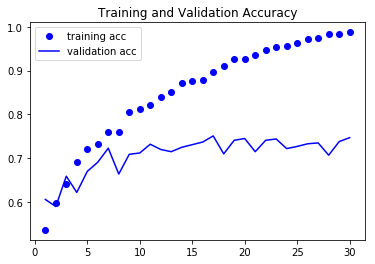

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

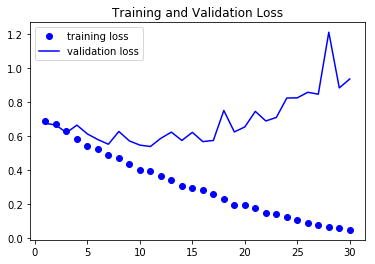

In [72]:
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and Validation Loss')
plt.legend()

From the plots it can be understood that the model is overfitting as the training accuracy increases and testing accuracy stabilizes after 10th epoch 

### Data Augmentation and Addition of dropout layer to avoid overfitting

In [74]:
datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [78]:
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]

In [86]:
img=image.load_img(img_path, target_size=[150,150])
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

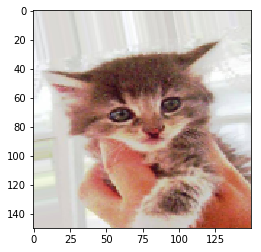

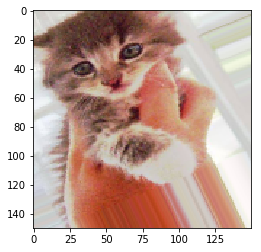

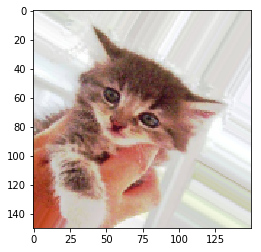

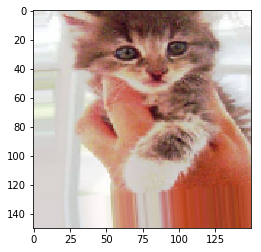

In [99]:
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot= plt.imshow(image.array_to_img(batch[0]))
    i+=1
    plt.show()
    if i % 4 ==0:
        break

    

In [100]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [101]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [102]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)


In [103]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=[150,150],batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [104]:
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=[150,150],batch_size=32,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [105]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 238s 2s/step - loss: 0.6878 - acc: 0.5350 - val_loss: 0.7284 - val_acc: 0.4956
Epoch 2/100
100/100 [==============================] - 244s 2s/step - loss: 0.6719 - acc: 0.5794 - val_loss: 0.6737 - val_acc: 0.5445
Epoch 3/100
100/100 [==============================] - 242s 2s/step - loss: 0.6642 - acc: 0.5922 - val_loss: 0.6269 - val_acc: 0.6396
Epoch 4/100
100/100 [==============================] - 249s 2s/step - loss: 0.6493 - acc: 0.6113 - val_loss: 0.6238 - val_acc: 0.6534
Epoch 5/100
100/100 [==============================] - 1170s 12s/step - loss: 0.6357 - acc: 0.6359 - val_loss: 0.6015 - val_acc: 0.6650
Epoch 6/100
100/100 [==============================] - 245s 2s/step - loss: 0.6205 - acc: 0.6591 - val_loss: 0.5908 - val_acc: 0.6849
Epoch 7/100
100/100 [==============================] - 245s 2s/step - loss: 0.5971 - acc: 0.6750 - val_loss: 0.5729 - val_acc: 0.6878
Epoch 8/100
100/100 [==============================] - 249s 

Epoch 62/100
100/100 [==============================] - 167s 2s/step - loss: 0.4158 - acc: 0.8019 - val_loss: 0.5814 - val_acc: 0.7392
Epoch 63/100
100/100 [==============================] - 170s 2s/step - loss: 0.4042 - acc: 0.8166 - val_loss: 0.5994 - val_acc: 0.7262
Epoch 64/100
100/100 [==============================] - 170s 2s/step - loss: 0.3999 - acc: 0.8147 - val_loss: 0.4400 - val_acc: 0.8080
Epoch 65/100
100/100 [==============================] - 169s 2s/step - loss: 0.3947 - acc: 0.8169 - val_loss: 0.4695 - val_acc: 0.7900
Epoch 66/100
100/100 [==============================] - 177s 2s/step - loss: 0.3970 - acc: 0.8200 - val_loss: 0.4425 - val_acc: 0.8170
Epoch 67/100
100/100 [==============================] - 169s 2s/step - loss: 0.3956 - acc: 0.8216 - val_loss: 0.3922 - val_acc: 0.8141
Epoch 68/100
100/100 [==============================] - 167s 2s/step - loss: 0.3895 - acc: 0.8250 - val_loss: 0.4221 - val_acc: 0.8157
Epoch 69/100
100/100 [==============================] -

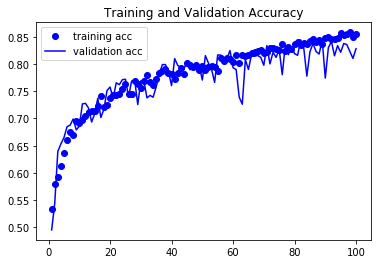

In [106]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

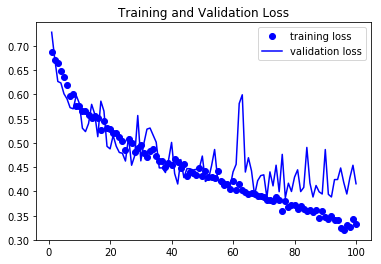

In [107]:
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
# By using regularization techniques and by tuning the network’s parameters the accuracy increased.